In [2]:
import yt
print(yt.__version__) # 3.6.0 or higher
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment

3.6.0


In [10]:
datfile = 'output/turbulence_0600.dat'
ds = yt.load(datfile)

yt : [INFO     ] 2020-11-07 18:52:48,518 Parameters: current_time              = 76.29591961461843
yt : [INFO     ] 2020-11-07 18:52:48,518 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-11-07 18:52:48,519 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-07 18:52:48,520 Parameters: domain_right_edge         = [3.5 2.8 2. ]
yt : [INFO     ] 2020-11-07 18:52:48,520 Parameters: cosmological_simulation   = 0


# 3D plot
(Not sure how to get something better-looking. Not even sure what I'd expect.)

In [26]:
#Find the min and max of the field
mi, ma = ds.all_data().quantities.extrema('m1')

In [27]:
# Choose a vector representing the viewing direction.
L = [0.5, 0.5, 0.5]
# Define the center of the camera to be the domain center
c = ds.domain_center[0]
# Define the width of the image
W = 1.5*ds.domain_width[0]
# Define the number of pixels to render
Npixels = 512

In [30]:
sc = yt.create_scene(ds, 'm1')
dd = ds.all_data()

source = sc[0]

source.log_field = False

tf = yt.ColorTransferFunction((mi, ma), grey_opacity=False)
tf.map_to_colormap(mi, ma, scale=15.0, colormap='algae')

source.set_transfer_function(tf)

sc.add_source(source)

cam = sc.add_camera()
cam.width = W
cam.center = c
cam.normal_vector = L
cam.north_vector = [1, 0, 1]

yt : [INFO     ] 2020-11-07 18:54:39,785 Rendering scene (Can take a while).
yt : [INFO     ] 2020-11-07 18:54:39,786 Creating volume


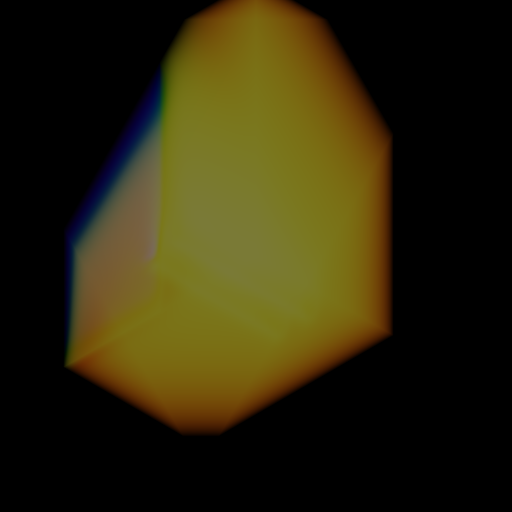

In [31]:
sc.show(sigma_clip=4)

# Slicing

yt : [INFO     ] 2020-11-07 19:08:50,482 xlim = 0.000000 3.500000
yt : [INFO     ] 2020-11-07 19:08:50,483 ylim = 0.000000 2.800000
yt : [INFO     ] 2020-11-07 19:08:50,483 xlim = 0.000000 3.500000
yt : [INFO     ] 2020-11-07 19:08:50,484 ylim = 0.000000 2.800000
yt : [INFO     ] 2020-11-07 19:08:50,485 Making a fixed resolution buffer of (('amrvac', 'm1')) 800 by 800



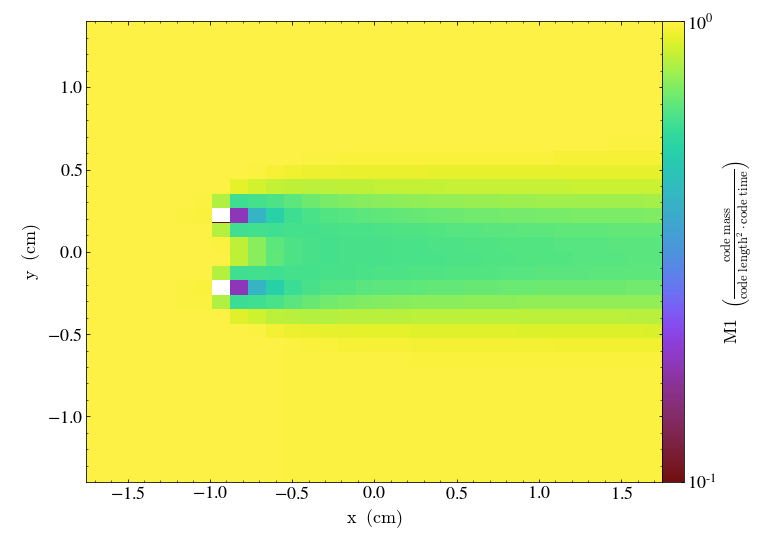

In [48]:
slc = yt.SlicePlot(ds, "z", "m1", center=[1.75, 1.4, 1.8])
slc.set_zlim('m1', .1, 1)
slc.show()